## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [6]:
!pip install py-openaq

In [7]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [8]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [9]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
4708,2021-10-09 11:00:00,ES1193A,o3,47.16,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-09 09:00:00+00:00,40.420000,-3.749167
9275,2021-10-06 10:00:00,ES1869A,no2,20.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-06 11:00:00+00:00,40.430000,-3.545830
20064,2021-09-30 15:00:00,"Sonia Vihar, Delhi - DPCC",co,0.80,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-30 09:30:00+00:00,28.710508,77.249485
34150,2021-09-29 03:30:00,"Bawana, Delhi - DPCC",no2,5.80,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 22:00:00+00:00,28.776200,77.051074
7831,2021-10-07 15:00:00,ES1806A,co,400.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-07 16:00:00+00:00,40.286940,-3.222220


In [10]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [11]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [12]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [13]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [139]:
filter1=(airQualityCities['parameter']=="o3")&(airQualityCities['value']>120)

In [140]:
airQualityCities[filter1]

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
36327,2021-09-28 22:00:00,"North Campus, DU, Delhi - IMD",o3,121.33,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:30:00+00:00,28.657381,77.158545


### Conclusion: 
#### Delhi and Madrid are recorded as two cities with levels of O3 larger than 120 µg/m³ 

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

In [103]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


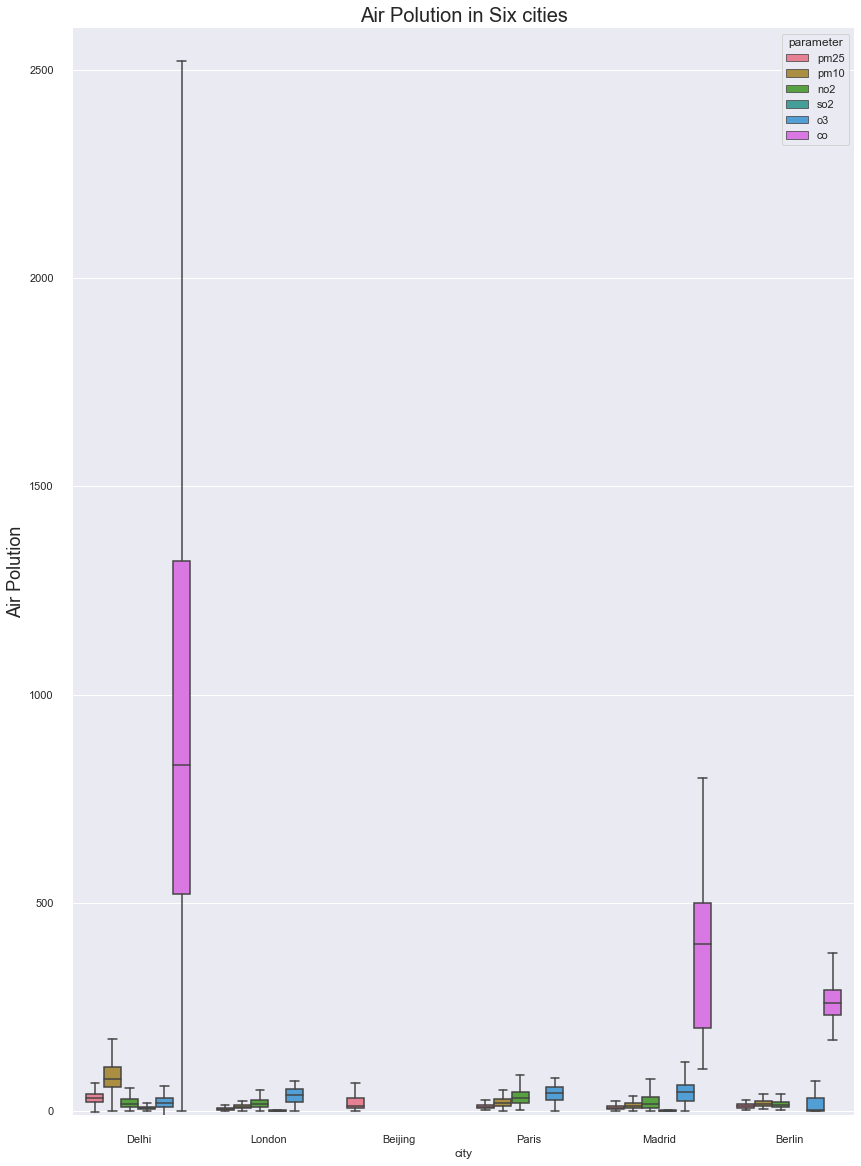

In [99]:
#set up a box plot for multiple cities and separate them into different parameters
fig, ax = plt.subplots(1, figsize=(14,20))

ax = sns.boxplot(
    x='city',
    y='value',
    hue='parameter',
    data=airQualityCities,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([-10, 2600])
ax.set_ylabel("Air Polution", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Polution in Six cities", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
Looking at the plot of "Air Polution in Six cities", London and Berlin seems to be cleanest cities. However it is hard to compare each parameter all at once. Next, we will set up plots for each paramater to see the differences.

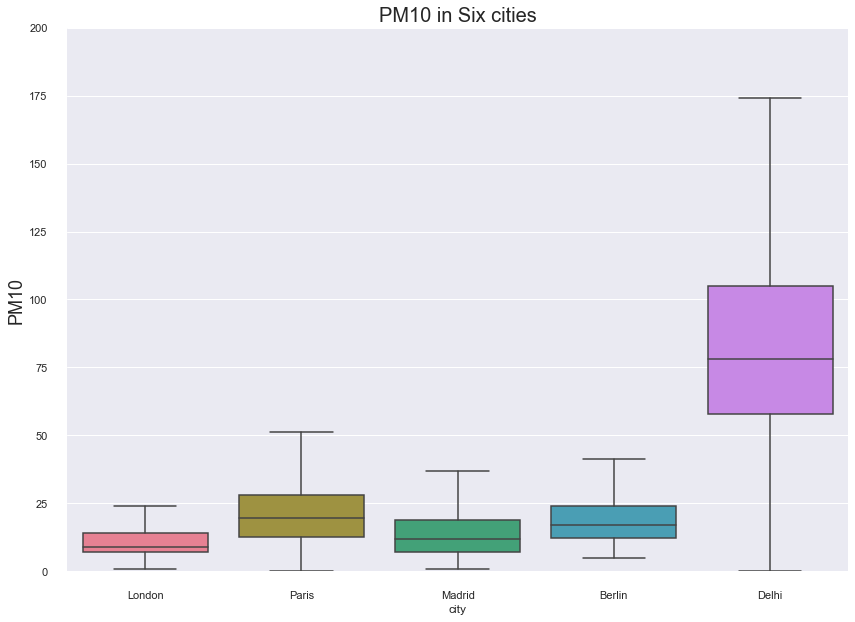

In [100]:
airQualityCitiesPM10=airQualityCities[airQualityCities['parameter']=='pm10']
fig, ax = plt.subplots(1, figsize=(14,10))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitiesPM10,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([0, 200])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")
ax.set_title("PM10 in Six cities", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
London is the cleanest city in terms of PM10. There are no records for Bejing.

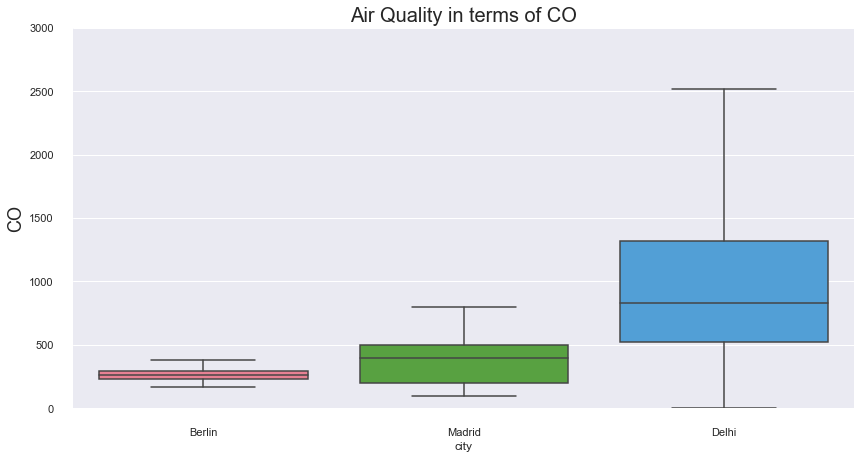

In [106]:
airQualityCitiesco=airQualityCities[airQualityCities['parameter']=='co']
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitiesco,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([0, 3000])
ax.set_ylabel("CO", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in terms of CO", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
Berlin is the cleanest city in terms of CO. There are no records for London, Paris & Bejing.

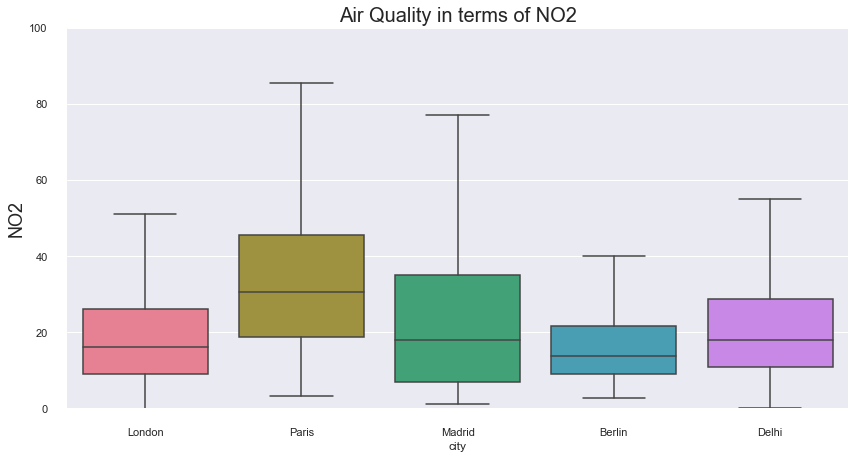

In [107]:
airQualityCitiesno2=airQualityCities[airQualityCities['parameter']=='no2']
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitiesno2,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([0, 100])
ax.set_ylabel("NO2", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in terms of NO2", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
Berlin is the cleanest city in terms of NO2. There are no records for Bejing.

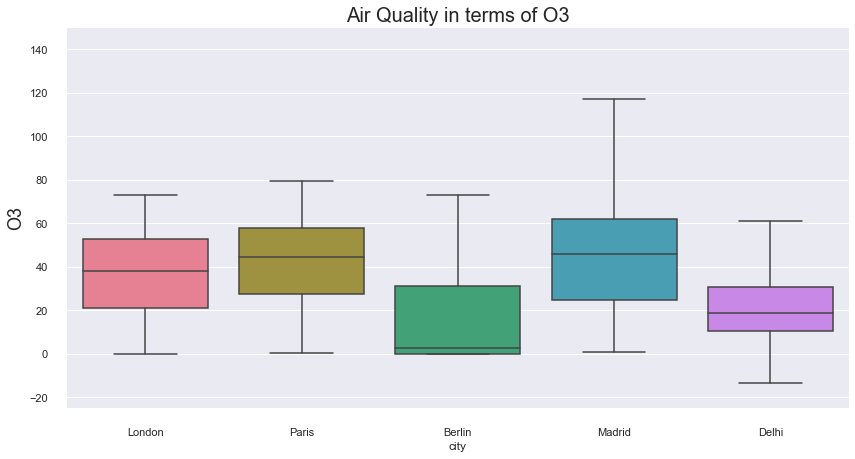

In [108]:
airQualityCitieso3=airQualityCities[airQualityCities['parameter']=='o3']
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitieso3,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([-25, 150])
ax.set_ylabel("O3", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in terms of O3", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
Berlin is the cleanest city in terms of CO. There are no records for Bejing.

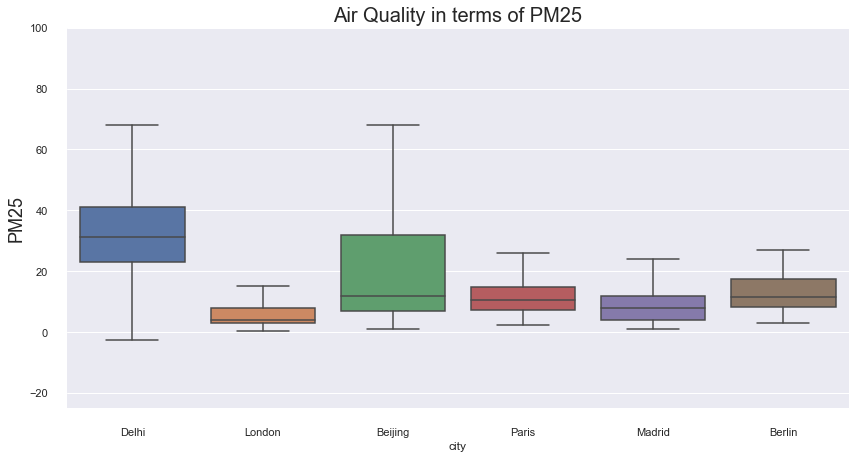

In [109]:
airQualityCitiespm25=airQualityCities[airQualityCities['parameter']=='pm25']
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitiespm25,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([-25, 100])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in terms of PM25", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
London is the cleanest city in terms of PM25. 

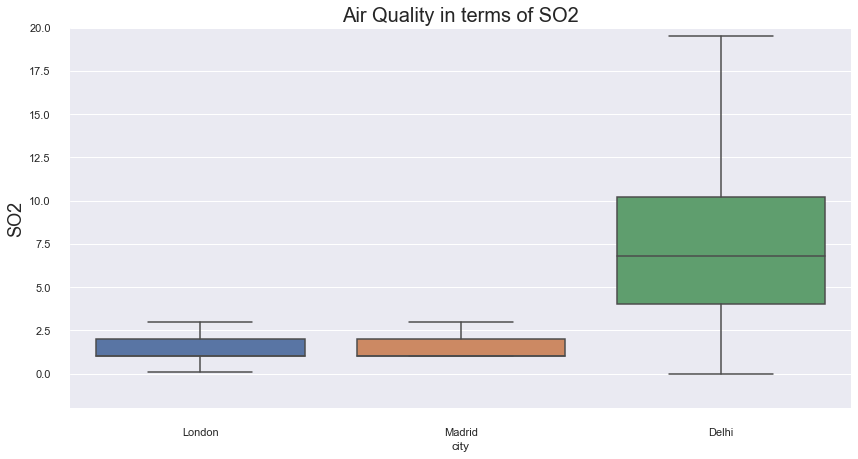

In [112]:
airQualityCitiesso2=airQualityCities[airQualityCities['parameter']=='so2']
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=airQualityCitiesso2,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([-2, 20])
ax.set_ylabel("SO2", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in terms of SO2", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Comment: 
London is the cleanest city in terms of CO. 

###  Conclusion: 
#### London is the cleanest city in terms of SO2, PM25 and Berlin is the cleanest city in terms of CO, PM10, O3

## Question 3. Which location is the most poluted in London ?

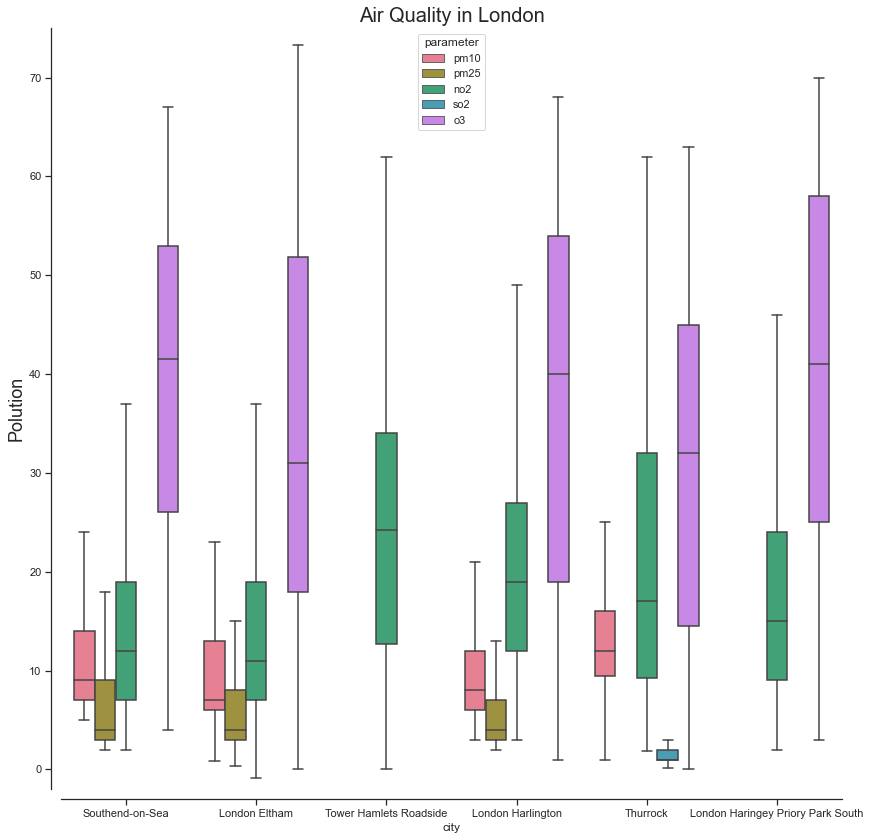

In [147]:
airQualityCities_in_London=airQualityCities[airQualityCities['city']=='London']

fig, ax = plt.subplots(1, figsize=(14,14))

ax = sns.boxplot(
    x='location',
    y='value',
    hue='parameter',
    data=airQualityCities_in_London,
    fliersize=0,
    palette='husl',
    ax=ax)

ax.set_ylim([-2, 75])
ax.set_ylabel("Polution", fontsize=18)
ax.set_xlabel("city")
ax.set_title("Air Quality in London", fontsize=20)

sns.despine(offset=10)

plt.show()

###  Conclusion: 
Compare the mean of parameters' values, Southend-on-Sea is the most polluted city in terms of O3 and PM25, Tower Hamlets Roadside is the most polluted city in terms of NO2, Thurrock is the most polluted city in terms of PM10. SO2 concentrations have not been recorded from most locations in London, excepted Thurrock. 
Southend-on-Sea seems to be the most polluted city with provided parameters. 

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [55]:
airQualityCities_in_London.groupby('location').count()

,date.local,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,date.local.timeformat,date.utc.timeformat
location,,,,,,,,,,,
London Eltham,958,958,958,958,958,958,958,958,958,958,958
London Haringey Priory Park South,629,629,629,629,629,629,629,629,629,629,629
London Harlington,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
Southend-on-Sea,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355
Thurrock,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349
Tower Hamlets Roadside,296,296,296,296,296,296,296,296,296,296,296


### check Dtype of data.utc

In [28]:

airQualityCities_in_London.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5772 entries, 1 to 37014
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             5772 non-null   object 
 1   location               5772 non-null   object 
 2   parameter              5772 non-null   object 
 3   value                  5772 non-null   float64
 4   unit                   5772 non-null   object 
 5   country                5772 non-null   object 
 6   city                   5772 non-null   object 
 7   date.utc               5772 non-null   object 
 8   coordinates.latitude   5772 non-null   float64
 9   coordinates.longitude  5772 non-null   float64
dtypes: float64(3), object(7)
memory usage: 656.0+ KB


### convert date.utc to date time format then add a column named "date.utc.timeformat" to the table airQualityCities_in_London

In [154]:
pd.set_option('mode.chained_assignment', None)


airQualityCities_in_London['date.utc.timeformat']=pd.to_datetime(airQualityCities_in_London['date.utc'])
airQualityCities_in_London


,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude,date.utc.timeformat
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408,2021-10-12 17:00:00+00:00
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 17:00:00+00:00
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155,2021-10-12 17:00:00+00:00
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766,2021-10-12 17:00:00+00:00
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614,2021-10-12 17:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
36973,2021-09-28 16:00:00,London Haringey Priory Park South,no2,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254,2021-09-28 15:00:00+00:00
36979,2021-09-28 16:00:00,London Haringey Priory Park South,o3,57.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254,2021-09-28 15:00:00+00:00
36982,2021-09-28 16:00:00,London Eltham,pm10,7.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766,2021-09-28 15:00:00+00:00
36984,2021-09-28 16:00:00,Thurrock,no2,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969,2021-09-28 15:00:00+00:00


In [155]:
#check Dtpe of date.utc.timeformat

airQualityCities_in_London.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5772 entries, 1 to 37014
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   date.local             5772 non-null   object             
 1   location               5772 non-null   object             
 2   parameter              5772 non-null   object             
 3   value                  5772 non-null   float64            
 4   unit                   5772 non-null   object             
 5   country                5772 non-null   object             
 6   city                   5772 non-null   object             
 7   date.utc               5772 non-null   object             
 8   coordinates.latitude   5772 non-null   float64            
 9   coordinates.longitude  5772 non-null   float64            
 10  date.utc.timeformat    5772 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), object(7)
memory

In [156]:
airQualityCities_in_London['date.utc.timeformat'].agg([min,max])

min   2021-09-28 15:00:00+00:00
max   2021-10-12 17:00:00+00:00
Name: date.utc.timeformat, dtype: datetime64[ns, UTC]

### Plot the evolution of air polution accross time in locations in London 

Text(0.5, 0.98, 'Air polution accross time in locations in London ')

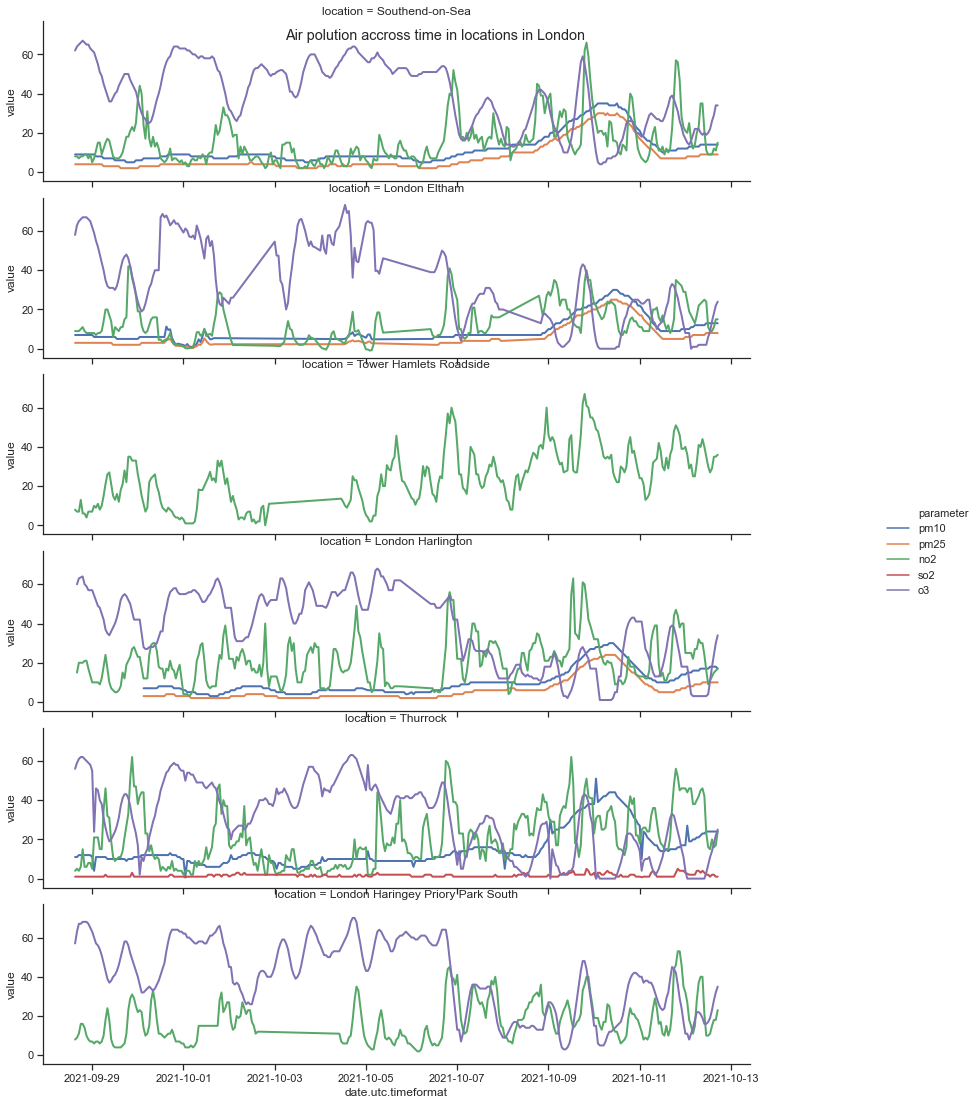

In [167]:
g=sns.relplot(data=airQualityCities_in_London, x="date.utc.timeformat", y="value", hue="parameter", row="location",kind="line",linewidth=2)
g.fig.set_size_inches(15,15)
g.fig.suptitle('Air polution accross time in locations in London ')

### Conclusion: 
#### In London, between 2021-09-28 to 2021-10-12, NO2 and O3 concentrations were fluctuated. PM10, SO2 and PM25 concentrations were almost stable and increased at the end of time period.

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [27]:
### response: they are strongly correlated

### Create a table airQualityCities_in_London_pm10 contains pm10 value

In [135]:
#filter airQualityCities_in_London with pm10

airQualityCities_in_London_pm10=airQualityCities_in_London[airQualityCities_in_London['parameter']=='pm10']

#add a column 'pm10' into table airQualityCities_in_London_pm10

airQualityCities_in_London_pm10['pm10']=airQualityCities_in_London_pm10['value']

#choose 3 columns ("location","pm10","date.utc.timeformat") to displayas the table airQualityCities_in_London_pm10

airQualityCities_in_London_pm10=airQualityCities_in_London_pm10[["location","pm10","date.utc.timeformat"]]
airQualityCities_in_London_pm10

,location,pm10,date.utc.timeformat
1,Southend-on-Sea,14.0,2021-10-12 17:00:00+00:00
5,London Harlington,17.0,2021-10-12 17:00:00+00:00
8,London Eltham,13.0,2021-10-12 17:00:00+00:00
11,Thurrock,24.0,2021-10-12 17:00:00+00:00
25,London Eltham,13.0,2021-10-12 16:00:00+00:00
...,...,...,...
36469,Southend-on-Sea,9.0,2021-09-28 16:00:00+00:00
36591,London Eltham,7.0,2021-09-28 16:00:00+00:00
36900,Southend-on-Sea,9.0,2021-09-28 15:00:00+00:00
36965,Thurrock,11.0,2021-09-28 15:00:00+00:00


### Create a table airQualityCities_in_London_pm10 contains pm25 value

In [134]:
#filter airQualityCities_in_London with pm25

airQualityCities_in_London_pm25=airQualityCities_in_London[airQualityCities_in_London['parameter']=='pm25']

#add a column 'pm10' into table airQualityCities_in_London_pm25

airQualityCities_in_London_pm25['pm25']=airQualityCities_in_London_pm25['value']

#choose 3 columns ("location","pm10","date.utc.timeformat") to displayas the table airQualityCities_in_London_pm25

airQualityCities_in_London_pm25=airQualityCities_in_London_pm25[["location","pm25","date.utc.timeformat"]]
airQualityCities_in_London_pm25

,location,pm25,date.utc.timeformat
2,London Eltham,8.0,2021-10-12 17:00:00+00:00
9,London Harlington,10.0,2021-10-12 17:00:00+00:00
12,Southend-on-Sea,9.0,2021-10-12 17:00:00+00:00
23,London Eltham,8.0,2021-10-12 16:00:00+00:00
30,London Harlington,10.0,2021-10-12 16:00:00+00:00
...,...,...,...
36103,London Eltham,3.0,2021-09-28 17:00:00+00:00
36468,Southend-on-Sea,4.0,2021-09-28 16:00:00+00:00
36594,London Eltham,3.0,2021-09-28 16:00:00+00:00
36873,Southend-on-Sea,4.0,2021-09-28 15:00:00+00:00


### In order to visual a regression model, merge pm10 value and pm25 into a table with two keys "location" and "date.utc.timeformat"

In [94]:
airQualityCities_in_London_pm10_pm25=pd.merge(airQualityCities_in_London_pm10, airQualityCities_in_London_pm25, on=["location", "date.utc.timeformat"])
airQualityCities_in_London_pm10_pm25

,location,pm10,date.utc.timeformat,pm25
0,Southend-on-Sea,14.0,2021-10-12 17:00:00+00:00,9.0
1,London Harlington,17.0,2021-10-12 17:00:00+00:00,10.0
2,London Eltham,13.0,2021-10-12 17:00:00+00:00,8.0
3,London Eltham,13.0,2021-10-12 16:00:00+00:00,8.0
4,London Harlington,18.0,2021-10-12 16:00:00+00:00,10.0
...,...,...,...,...
844,Southend-on-Sea,9.0,2021-09-28 17:00:00+00:00,4.0
845,Southend-on-Sea,9.0,2021-09-28 16:00:00+00:00,4.0
846,London Eltham,7.0,2021-09-28 16:00:00+00:00,3.0
847,Southend-on-Sea,9.0,2021-09-28 15:00:00+00:00,4.0


### Visual regression models of pm 10 and pm25

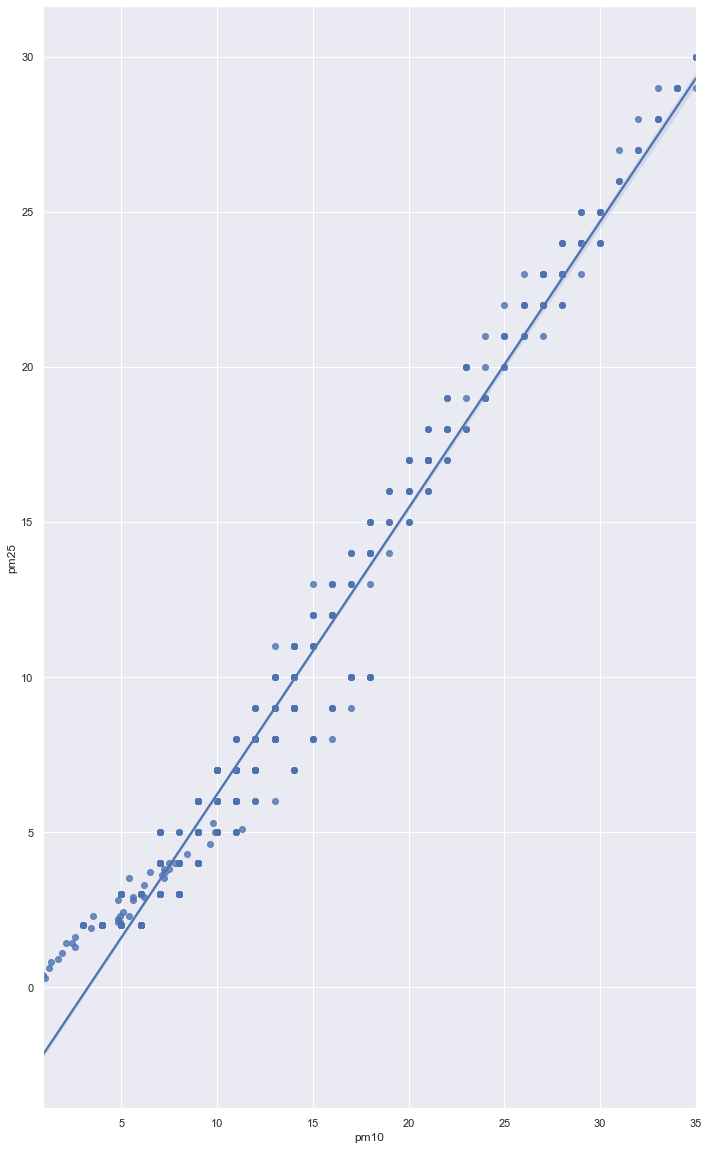

In [91]:
sns.regplot(x="pm10",y="pm25", data=airQualityCities_in_London_pm10_pm25)

In [92]:
#Compute pairwise correlation of PM10 and PM25

airQualityCities_in_London_pm10_pm25.corr()

,pm10,pm25
pm10,1.00000,0.98929
pm25,0.98929,1.00000


### Conclusion: PM10 and PM25 are strongly positively correlated with a correlation = 0.98929.